# Contents
- [1. re library](#1.-re-library)
- [2. Constant pattern](#2.-Constant-Pattern-(fixed-characters))
     - [2.1 Match](#2.1-Match)
     - [2.2 Start and end function](#2.2-Start-and-end-function)
     - [2.3 Search](#2.3-Search)
     - [2.4 Findall](#2.4-Findall)
     - [2.5 Split](#2.5-Split)
     - [2.6 Sub](#2.6-Sub)
     - [2.7 Complie](#2.7-Compile)
- [3. Non Constant Pattern](#3.-Non-Constant-Pattern)
    - [3.1 Extract each character of a string](#3.1-Extract-each-character-of-a-string)
    - [3.2 Extract theeach word](#3.2-Extract-the-each-word)
    - [3.3 Extract the first word](#3.3-Extract-the-first-word)
    - [3.4 Extract the last word](#3.4-Extract-the-last-word)
    - [3.5 Extract the consecutive two characters without including spaces](#3.5-Extract-the-consecutive-two-characters-without-including-the-spaces)
    - [3.6 Extract the consecutive two charcters of the start of a word only](#3.6-Extract-the-consecutive-two-characters-of-the-start-of-a-word-only)
    - [3.7 Extract the domain name](#3.7-Extract-the-domain-name)
    - [3.8 Extract the domain name only](#3.8-Extract-the-domain-name-only)
    - [3.9 Extract the dates](#3.9-Extract-the-date)
    - [3.10 Extract the words within []](#3.10-Extract-words-within-[])
    - [3.11 Validate a phone number](#3.11-Validate-a-phone-number)
    - [3.12 Split String](#3.12-Split-string)
    - [3.13 Replace a string with space](#3.13-Replace-a-string-with-space)
- [4. Special Sequences](#4.-Special-sequences)
- [5. Meta Characters](#5.-Meta-characters)
- [6. Sets](#6.-Sets)
- [7. Complex Problems](#7.-Complex-problems)'
- [8. Working with titanic dataset](#8.-Working-with-titanic-dataset)

# 1. re library
- re library is a python's standard library which provide functions and methods for working with regular expressions.
- Regular expressions are powerful patterns used for searching, matching and manipulating text.

In [63]:
import re
import pandas as pd

# 2. Constant Pattern (fixed characters)
**We have a specific search pattern** 

## 2.1 Match 
```python
re.match(pattern, string)
```
#### This method finds match if it occurs at the start of the string.

In [15]:
result = re.match(r'Gold', 'Gold D. Roger')  # 'r' inside the function designates python raw string
print(result)                                                                                    

<re.Match object; span=(0, 4), match='Gold'>


In [16]:
### use group method to print the output

print(result.group(0))

Gold


In [18]:
### The function will not work for the succeeding strings

result_mid = re.match(r'D', 'Gold D. Roger')
print(result_mid)            ## note we are not using group function here to print the output

None


## 2.2 Start and end function
#### It is usefull to find the start and end position of the string

In [28]:
result_1 = re.match(r'Gold', 'Gold D.roger')
print(result_1.start(), result_1.end(), sep="\n")      ## output is the position of the strings

0
4


## 2.3 Search 
#### Unlike match function it helps to find the string that is present anywhere in the collection of strings.

In [29]:
result_2 = re.search(r'D', 'Gold D. Roger')
print(result_2.group())

D


## 2.4 Findall
#### It helps to find the occurences of a string present at any position and also it will return any number of occurences that is present.
#### Use the findall function more frequently as it will both work as match and search.

In [30]:
result_3 = re.findall(r'D', 'Gold D. Roger, Monkey D. Luffy, Monkey D. Garp')
print(result_3)

['D', 'D', 'D']


## 2.5 Split 
#### Helps to split  a string by the occurence of a given pattern.

In [31]:
result_4 = re.split(r'D', 'Gold D. Roger')
print(result_4)

['Gold ', '. Roger']


In [32]:
### maxsplit argument in split function

result_5 = re.split(r'o', 'Gold D. Roger', maxsplit=2)
print(result_5)

['G', 'ld D. R', 'ger']


## 2.6 Sub
#### It helps to search and replace a string.

In [33]:
result_6 = re.sub(r'Luffy', 'Dragon', 'Monkey D. Luffy')   ## existing, newstring, complete string
print(result_6)

Monkey D. Dragon


## 2.7 Compile
#### It is used for precompiling a regular expression in a regular expression object, which can later be used got pattern match operations.

In [34]:
pattern = re.compile("D")
result_7 = pattern.findall('Gold D. Roger, Monkey D Luffy, Monkey D Dragon, Monkey D Garp')
print(result_7)         ## inplace of findall we can also use other search and match functions

['D', 'D', 'D', 'D', 'D']


[Go to contents](#Contents)

# *******************************************************************************************

# 3. Non Constant Pattern
**We do not have a specific search pattern but we want to return a specific set of characters** 

**This can be solved by operators(meta and literal characters)**

The following are the most commonly operators[special squences] used for webscrapping and text mining.

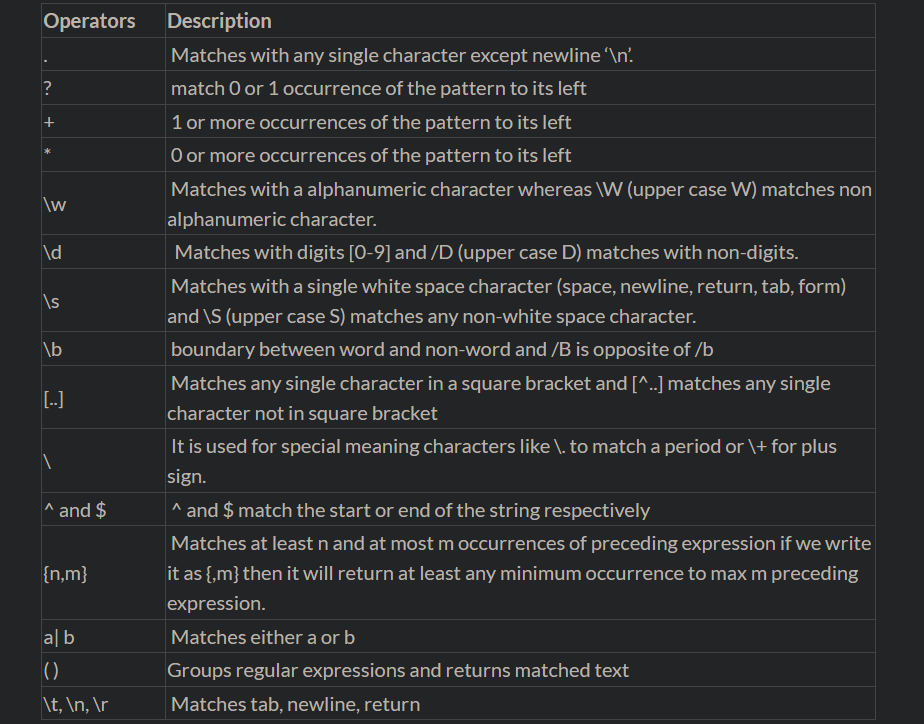

## 3.1 Extract each character of a string

In [35]:
output = re.findall(r'.', 'One Piece')
print(output)

['O', 'n', 'e', ' ', 'P', 'i', 'e', 'c', 'e']


In [38]:
### The '\w' does not extracts white spaces

output_1 = re.findall(r'\w', 'One Piece')
print(output_1)

['O', 'n', 'e', 'P', 'i', 'e', 'c', 'e']


In [5]:
output_2 = re.findall(r'\w*', ' The King of the pirates')
print(output_2)

['', 'The', '', 'King', '', 'of', '', 'the', '', 'pirates', '']


In [6]:
### To exclude white spaces

output_3 = re.findall(r'\w+', 'The King of the pirates')
print(output_3)

['The', 'King', 'of', 'the', 'pirates']


## 3.3 Extract the first word

In [7]:
output_4 = re.findall(r'^\w+', 'The king of the pirates')
print(output_4)

['The']


## 3.4 Extract the last word

In [14]:
output_5 = re.findall(r'\w+$', 'The kind of the pirates')
print(output_5)

['pirates']


## 3.5 Extract the consecutive two characters without including the spaces

In [15]:
output_6 = re.findall(r'\w\w', 'The king of the pirates')
print(output_6)

['Th', 'ki', 'ng', 'of', 'th', 'pi', 'ra', 'te']


## 3.6 Extract the consecutive two characters of the start of a word only

In [17]:
output_7 = re.findall(r'\b\w.', 'The king of the pirates')
print(output_7)

['Th', 'ki', 'of', 'th', 'pi']


## 3.7 Extract the domain name 

In [22]:
output_8 = re.findall(r'@\w+', 'abc.test@gmail.com, xyz@test.in, test.first@ymail.com, first.test@rest.biz')
print(output_8)

['@gmail', '@test', '@ymail', '@rest']


In [24]:
### to include .com part

output_9 = re.findall(r'@\w+.\w+', 'abc.test@gmail.com, xyz@test.in, test.first@ymail.com, first.test@rest.biz')
print(output_9)

['@gmail.com', '@test.in', '@ymail.com', '@rest.biz']


## 3.8 Extract only the domain name

In [25]:
output_10 = re.findall(r'@\w+.(\w+)', 'abc.test@gmail.com, xyz@test.in, test.first@ymail.com, first.test@rest.biz')
print(output_10)

['com', 'in', 'com', 'biz']


## 3.9 Extract the date 

In [26]:
output_11 = re.findall(r'\d{2}-\d{2}-\d{4}', 'Raj 34-34343 01-02-2023, Dhivi 43-43434 02-03-2023, Rahul 55-55555 03-03-2023')
print(output_11)

['01-02-2023', '02-03-2023', '03-03-2023']


In [27]:
### only extracting the year

output_12 = re.findall(r'\d{2}-\d{2}-(\d{4})', 'Raj 34-34343 01-02-2023, Dhivi 43-43434 02-03-2023, Rahul 55-55555 03-03-2023')
print(output_12)

['2023', '2023', '2023']


## 3.10 Extract words within []

In [28]:
output_13 = re.findall(r'[aeiouAEIOU]\w+', 'The king of the pirates')
print(output_13)

['ing', 'of', 'irates']


In [30]:
### There are words starting from the min to drop these use boundry

output_14 = re.findall(r'\b[aeiouAEIOU]\w+', 'The king of the pirates')
print(output_14)

['of']


In [31]:
### We can also use ^ i.e starting with constant

output_15 = re.findall(r'\b[^aeiouAEIOU]\w+', 'The king of the pirates')
print(output_15)

['The', ' king', ' of', ' the', ' pirates']


## 3.11 Validate a phone number
**Must start with 8 or 9 and should contain 10 digits**

In [34]:
l = ['9999999999', '999999-999', '99999x9999']
for val in l:
    if re.match(r'[8-9]{1}[0-9]{9}',val) and len(val)==10:
        print('Yes')
    else:
        print('No')

Yes
No
No


## 3.12 Split string

In [37]:
str = 'Hello,i\'am,dhanush,raj;form,TRK'
output_16 = re.split(r'[,;\s]', str)
print(output_16)

['Hello', "i'am", 'dhanush', 'raj', 'form', 'TRK']


## 3.13 Replace a string with space

In [38]:
output_17 = re.sub(r'[,;\s]', ' ', str)
print(output_17)

Hello i'am dhanush raj form TRK


# *******************************************************************************************

# 4. Special sequences
**1. \b returns a match where the specified pattern is at the end of the string**

**2. \d returns a match if the string contains any number**

**3. \D returns a match if the string does not contain any digits**

**4. \w extraction of alphanumeric characters**

**5. \W extraction of every non alphanumeric characters**

[Go to contents](#Contents)

# *******************************************************************************************

# 5. Meta characters
**1. "." matchs any character except newline character**

**2. "^" returns the begining word of the string**

**3. "$" returns the end of the string**

**4. "*" matchs zero or more occurences of the pattern to the left of it**

**5. "+" matches for one or more occurences of the pattern to the left of it**

**6. "?" matches zero or one occurences of the pattern to the left of it**

**7. "|" either, or

In [43]:
### "*" 

strs = 'easy eassssy eay ey'

## chech if the string contains 'ea' followed by 0 or more 's' and ending with 'y'

x = re.findall('eas*y*', strs)
print(x)

['easy', 'eassssy', 'eay']


In [46]:
### "+"

### check if the string contains 'ea' followed by 1 or more 's' and ending with 'y'

y = re.findall('eas+y', strs)
print(y)

['easy', 'eassssy']


In [48]:
### "?"

### chech if the string contains 'ea' followed by 0 or 1 's' and ends with 'y'

z = re.findall('eas?y', strs)
print(z)

['easy', 'eay']


In [49]:
### "|"

### check if the string contains 'easy' or 'ey'

h = re.findall('easy|ey', strs)
print(h)

['easy', 'ey']


# *******************************************************************************************

# 6. Sets
**Sets are a bunch of characters inside a []**

In [55]:
strr = "All you need is DISCIPLINE and HARD WORK with the right MINDSET"

a = re.findall('[iAll]', strr)
print(a)

['A', 'l', 'l', 'i', 'A', 'i', 'i']


In [51]:
### between a-h

b = re.findall('[a-h]', strr)
print(b)

['e', 'e', 'd', 'h', 'h', 'e', 'g', 'h']


In [57]:
### check if every word character has character other than y, d, h

strsr = 'Analytics Vidhya is the largest data science community of India'
c = re.findall("[^ydh]", strsr)
print(c)           ## output is every string other than ydh

['A', 'n', 'a', 'l', 't', 'i', 'c', 's', ' ', 'V', 'i', 'a', ' ', 'i', 's', ' ', 't', 'e', ' ', 'l', 'a', 'r', 'g', 'e', 's', 't', ' ', 'a', 't', 'a', ' ', 's', 'c', 'i', 'e', 'n', 'c', 'e', ' ', 'c', 'o', 'm', 'm', 'u', 'n', 'i', 't', ' ', 'o', 'f', ' ', 'I', 'n', 'i', 'a']


[Go to contents](#Contents)

# *******************************************************************************************

# 7. Complex problems

In [58]:
### extracting emails

email = 'Send the message to the following mails raj@gmail.com, dhanush123@hotmail.com'

d = re.findall('[a-zA-Z0-9.]+@\w+\.com', email)
print(d)

['raj@gmail.com', 'dhanush123@hotmail.com']


In [60]:
### extracting dates

dates = 'Today is monday i.e 22 mar 2023 and tomorrow is 23 mar 2023'

e = re.findall('\d{2} \w{3} \d{4}', dates)
print(e)

['22 mar 2023', '23 mar 2023']


In [62]:
dates_new = 'My birthday is at 22 december 2023 and my mom birthday is at 1 august 1980'

f = re.findall('\d{1,2} \w{1,10} \d{4}', dates_new)          ## 1,2 and 1,10 are ranges
print(f)

['22 december 2023', '1 august 1980']


# *******************************************************************************************

# 8. Working with titanic dataset

## Extracting names

In [65]:
df = pd.read_csv(r'F:\datasets\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [69]:
name = 'Allen, Mr.William Henry'
name1 = name.split('.')
name1

['Allen, Mr', 'William Henry']

In [74]:
name1[0].split(',')

['Allen', ' Mr']

In [71]:
name3 = re.split(r'[.\s]', name)
name3

['Allen,', 'Mr', 'William', 'Henry']

In [75]:
name_new = df['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
name_new.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Name, dtype: int64

In [76]:
### This method might not work all the time therefore define a pattern and use regx

In [77]:
### regx

def name_split(name):
    return re.findall("\w+\.", name)[0]

In [78]:
name_new1 = df['Name'].apply(lambda x: name_split(x))
name_new1.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

# *******************************************************************************************

[Go to contents](#Contents)